# *END to END data analytics project with PYTHON*

## **1. Business Problem/Project Understanding** 
- we have to do analytical report which mean complete analysis on data.
- **Business Problem** 
    - An NBFC (non banking finance company) was suppose to give loan to different peoples.
    - The major aim is to predict which type of the customers will have their loan approved.
    - for getting loan depends upon a person's,
        - no. of dependent 
        - Applicants income
        - Coapplicants income
        - loan amount
        - loan amount duration
        - credit history

- Columns and Descriptions

    <pre>
    Loan_ID ---	A unique loan ID
    Gender ---	Male / Female
    Married ---	Married (Yes) / Not married (No)
    Dependents ---	Number of persons depending on the client
    Education ---	Applicant Education (Graduate / Undergraduate)
    Self_Employed ---  Self employed (Yes / No)
    ApplicantIncome ---	Applicant income
    Coapplicant income ---	Coapplicant income
    LoanAmount ---	Loan amount in thousands
    Loan_Amount_Term ---  Term of loan in months
    Credit_History ---	Credit history meets guidelines
    Property_Area ---	Urban / Semiurban / Rural
    Loan_Status ---	Loan approved (Y / N)
    <pre>

In [110]:
# load all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## **2.EXTRACT**
- load (from excel/csv file) or connect (from database) raw data.
- data understanding
- data exploration

### **2.1 data loading**

In [111]:
df=pd.read_csv('/Users/sakshisahu/Documents/learning/Data_Analytics/data/LoanData.csv')
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


### **2.2 data understanding**

In [112]:
df.shape

(614, 13)

***observation** - observe we have 614 records/rows and 13 features/columns*

In [113]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

***observation** - done this to check is the columns names is as per the syntax or is it is having whitespaces etc otherwise then we need to modify it by renaming it.*

### **2.3 data exploration**
- first we do .unique() and .value_counts() in each column to better understand the nature and distribution of the data.

In [114]:
df['Loan_ID'].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

***observation** - as there are alot of unique value so we have to do nunique. It is categorical variable as it is combination of letter and numbers*

In [115]:
df['Loan_ID'].nunique() # returns total no of unique values

614

***observation** - as it have 614 unique values and the records which mean it have all unique values.*

In [116]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

***observation** - It have 2 unique value and missing values in column.*

In [117]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

***observation** - It have more number of male applicants compare to female.*

In [118]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

***observation** - It have 2 unique value and missing values in column.*

In [119]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

***observtaion** - more number of applicant are married.*

In [120]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

***observation** - It have 4 unique values in which '3+' is a wrong data which lead to wrong datatype and have missing value in the column.*

In [121]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

***observation** - most applicants have 0 dependents.*

In [122]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

***observation** - It have 2 unique values.* 

In [123]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

***observation** - most of the applicants are graduated.*

In [124]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

***observation** - It have 2 unique values and have missing values in the column.*

In [125]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

***observation** - most of the applicants are salaried persons.*

In [126]:
df['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

***observation** - observe applicant income and found it is a continous variable as interval make more sense here.*

In [127]:
df['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

***observation** - observe value are like 1.51500000e+03 which mean 1.5x10^3 -- 1.5x1000 -- 1500 for writting this they have witten like that.*

In [128]:
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)
df['CoapplicantIncome'].unique()

array([    0,  1508,  2358,  4196,  1516,  2504,  1526, 10968,   700,
        1840,  8106,  2840,  1086,  3500,  5625,  1911,  1917,  2925,
        2253,  1040,  2083,  3369,  1667,  3000,  2067,  1330,  1459,
        7210,  1668,  1213,  2336,  3440,  2275,  1644,  1167,  1591,
        2200,  2250,  2859,  3796,  3449,  4595,  2254,  3066,  1875,
        1774,  4750,  3022,  4000,  2166,  1881,  2531,  2000,  2118,
        4167,  2900,  5654,  1820,  2302,   997,  3541,  3263,  3806,
        3583,   754,  1030,  1126,  3600,  2333,  4114,  2283,  1398,
        2142,  2667,  8980,  2014,  1640,  3850,  2569,  1929,  7750,
        1430,  2034,  4486,  1425,  1666,   830,  3750,  1041,  1280,
        1447,  3166,  3333,  1769,   736,  1964,  1619, 11300,  1451,
        7250,  5063,  2138,  5296,  2583,  2365,  2816,  2500,  1083,
        1250,  3021,   983,  1800,  1775,  2383,  1717,  2791,  1010,
        1695,  2054,  2598,  1779,  1260,  5000,  1983,  5701,  1300,
        4417,  4333,

***observation** - so, we round it off by simply converting into int. we treat the wroung dtype here as it is important for our data exploration process futher.*

In [129]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

***observation** - observe it is continous variable and due to it have some missing value the datatype converted from int to float.*

In [130]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

***observation** - It is categorical variable and we got months as float datatype. It also have some missing values.*

In [131]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

***observation** - most of the applicant applied for 360 months.*

In [132]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

***observation** - It is categorical variable with encoded data which have 2 unique values and have missing values in column.*

In [133]:
df['Credit_History'] = df['Credit_History'].replace({0:'No',1:'Yes'})

***observstion** - treated the encoded data so the data exploration process will be smooth.*

In [134]:
df['Credit_History'].value_counts()

Credit_History
Yes    475
No      89
Name: count, dtype: int64

***observation** - most of the applicant belongs to yes category.*

In [135]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

***observation** - It have 3 unique values.*

In [136]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

***observation** - many applicant applied are from semiurban area.*

In [137]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

***observation** - It have 2 unique values.*

In [138]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

***observation** - maximum people got the loan.*

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    int64  
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 62.5+ KB


***observation** - observing dtpes.*
- *"Dependents" have wrong dtype as it have wrong data 3+ that leads to wrong dtype.*
    - *It suppose to be int but it is object.*

- **"Loan_Amount_Term" have wrong dtype due to missing value.*
    - *It suppose to be int but it is float.*

### **creating list for different kinds of variables**

In [140]:
continous = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
count = ['Dependents','Loan_Amount_Term']
categorical = ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']

In [141]:
df[continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.00000,592.000000
mean,5403.459283,1621.24430,146.412162
std,6109.041673,2926.24876,85.587325
min,150.000000,0.00000,9.000000
25%,2877.500000,0.00000,100.000000
50%,3812.500000,1188.50000,128.000000
75%,5795.000000,2297.25000,168.000000
max,81000.000000,41667.00000,700.000000


***observation** - done this to observe all statistical measure on raw data, because for need statistical replacement in data cleaning process. The same describe function we have to apply on clean data to do data analysis.*

In [142]:
df[categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,Yes,Semiurban,Y
freq,489,398,480,500,475,233,422


***observation** - we apply describe function on categorical data and it gives count(non-missing values), unique values, top(mode) and frequency(of mode).*

### **checking outliers**

<Axes: ylabel='ApplicantIncome'>

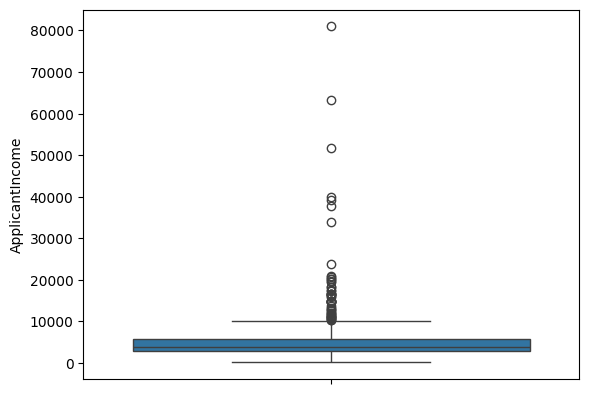

In [143]:
sn.boxplot(df['ApplicantIncome'])

<Axes: ylabel='CoapplicantIncome'>

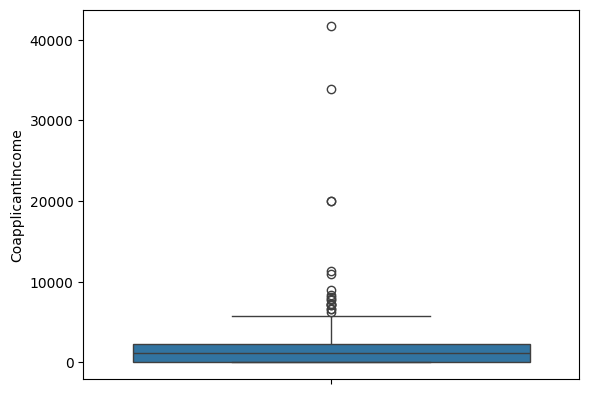

In [144]:
sn.boxplot(df['CoapplicantIncome'])

<Axes: ylabel='LoanAmount'>

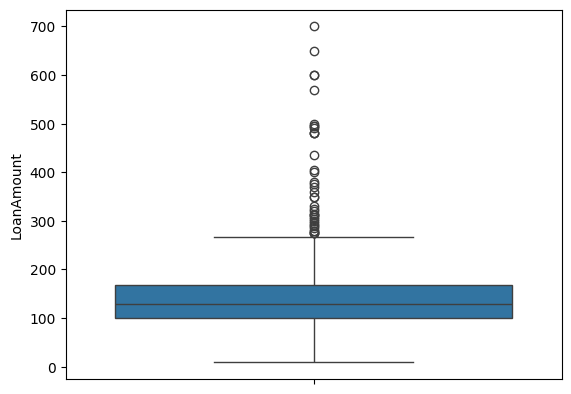

In [145]:
sn.boxplot(df['LoanAmount'])

In [146]:
df.duplicated().sum()

np.int64(0)

***observation** - there are no duplicate rows in your dataset.*

In [147]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## **3.TRANSFORM**
- data selestion
- data wrangling
- data adition (if required)
- data cleaning

### **3.1 data selection**
choosing which parts of data to keep and which to exclude.

In [148]:
df = df.drop(columns='Loan_ID')
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0,NaN,360.0,Yes,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,Yes,Rural,N


***observation** - just drop the Loan_ID column as it is not important.*

### **3.2 data addition** 
doing feature engineering

In [149]:
df['overall_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df = df.drop(columns=['ApplicantIncome','CoapplicantIncome'])
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,overall_Income
0,Male,No,0,Graduate,No,NaN,360.0,Yes,Urban,Y,5849
1,Male,Yes,1,Graduate,No,128.0,360.0,Yes,Rural,N,6091


***observation** - as loan amount decide based upon applicant income and coapplicant income so we combine them and create a new column called overall income and drop those two columns.*

In [150]:
continous = ['overall_Income','LoanAmount']

***observation** - updated the continous list.*

In [151]:
df[continous].describe()

,overall_Income,LoanAmount
count,614.000000,592.000000
mean,7024.703583,146.412162
std,6458.664751,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


***observation** - updated statistical measure for continous column.*

### **3.3 data cleaning**

#### **3.3.1 treating wrong data**

In [152]:
df['Dependents'] = df['Dependents'].replace({'3+':3})
df['Dependents'].unique()

array(['0', '1', '2', 3, nan], dtype=object)

#### **3.3.2 treating missing values**

In [153]:
#df["Gender"].mode()[0] → 'Male'
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Gender'].isnull().sum()

np.int64(0)

***reason** - all the missing value in gender column is replace by mode[0] which is male as it dominates the column.*

In [154]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Married'].isnull().sum()

np.int64(0)

***reason** - all the missing value in married column is replace by mode[0] which are married people as it dominates the column.*

In [155]:
df['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [156]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Self_Employed'].isnull().sum()

np.int64(0)

***reason** - all missing values is replace by mode[0] which are salary person as it domiante and dosent affect of getting loan amount.*

In [157]:
df = df.dropna() # drops entire rows having the missing data
df.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
overall_Income      0
dtype: int64

***reason** - reason to drop all the remaining missing values is, the remaining column having missing value 'Dependents', 'LoanAmount', 'Loan_Amount_Term' and 'Credit_History' are directly dependent on a person's getting loan. So, we can't replace them wrong values.*

#### **3.3.3 treating wrong dtypes**

In [158]:
df['Dependents'] = df['Dependents'].astype(int)
df['Dependents'].dtype

dtype('int64')

***reason** - due to the wrong value "3+" in dependents column the dtype become object(string) as it is a string value, that's why we convert it to int as no. of dependents will always be integer number.*

In [159]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)
df['Loan_Amount_Term'].dtype

dtype('int64')

***reason** - due to missing value in loan amount term column the entire column dtype becomes float, that's why we change it to int because the months are always integer.*

#### **3.3.4 treating outliers**

we retrain the outliers in both 'overall_Income' and 'LoanAmount' as there is a possibility of a person earning more than average and a person can also apply for higher loan amount.

In [160]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,overall_Income
1,Male,Yes,1,Graduate,No,128.0,360,Yes,Rural,N,6091
2,Male,Yes,0,Graduate,Yes,66.0,360,Yes,Urban,Y,3000
3,Male,Yes,0,Not Graduate,No,120.0,360,Yes,Urban,Y,4941
4,Male,No,0,Graduate,No,141.0,360,Yes,Urban,Y,6000
5,Male,Yes,2,Graduate,Yes,267.0,360,Yes,Urban,Y,9613


***Observation** - Now the data is cleaned and ready for data analysis*

### **3.4 downloading clean data**

In [161]:
df.to_csv('cleaned_loan_data.csv',index=False)